## Data Import

In [2]:
import pandas as pd

In [3]:
movies = pd.read_excel('Dataset/Movie_Dataset.xlsx')

In [4]:
movies

,movie_title,year,director_name,actor_name,genres,country
0,Avatar,2009.0,James Cameron,CCH Pounder,Action|Adventure|Fantasy|Sci-Fi,USA
1,Pirates of the Caribbean: At World's End,2007.0,Gore Verbinski,Johnny Depp,Action|Adventure|Fantasy,USA
2,Spectre,2015.0,Sam Mendes,Christoph Waltz,Action|Adventure|Thriller,UK
3,The Dark Knight Rises,2012.0,Christopher Nolan,Tom Hardy,Action|Thriller,USA
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,Doug Walker,Documentary,NaN
...,...,...,...,...,...,...
5038,Signed Sealed Delivered,2013.0,Scott Smith,Eric Mabius,Comedy|Drama,Canada
5039,The Following,NaN,NaN,Natalie Zea,Crime|Drama|Mystery|Thriller,USA
5040,A Plague So Pleasant,2013.0,Benjamin Roberds,Eva Boehnke,Drama|Horror|Thriller,USA
5041,Shanghai Calling,2012.0,Daniel Hsia,Alan Ruck,Comedy|Drama|Romance,USA


## Data Cleaning

In [5]:
import pandas as pd

movies['genres'] = movies['genres'].str.lower()

def format_genres(genres):
 genres = genres.split('|')
 if len(genres) > 1:
     genres = ', '.join(genres[:-1]) + ' and ' + genres[-1]
 else:
     genres = genres[0]
 return genres

movies['genres'] = movies['genres'].apply(format_genres)

movies.dropna(inplace=True)

movies['year'] = pd.to_numeric(movies['year'], errors='coerce').fillna(0).astype(int)

In [6]:
movies

,movie_title,year,director_name,actor_name,genres,country
0,Avatar,2009,James Cameron,CCH Pounder,"action, adventure, fantasy and sci-fi",USA
1,Pirates of the Caribbean: At World's End,2007,Gore Verbinski,Johnny Depp,"action, adventure and fantasy",USA
2,Spectre,2015,Sam Mendes,Christoph Waltz,"action, adventure and thriller",UK
3,The Dark Knight Rises,2012,Christopher Nolan,Tom Hardy,action and thriller,USA
5,John Carter,2012,Andrew Stanton,Daryl Sabara,"action, adventure and sci-fi",USA
...,...,...,...,...,...,...
5037,Newlyweds,2011,Edward Burns,Kerry Bishé,comedy and drama,USA
5038,Signed Sealed Delivered,2013,Scott Smith,Eric Mabius,comedy and drama,Canada
5040,A Plague So Pleasant,2013,Benjamin Roberds,Eva Boehnke,"drama, horror and thriller",USA
5041,Shanghai Calling,2012,Daniel Hsia,Alan Ruck,"comedy, drama and romance",USA


## Program Creation

Question 1. What is the title of the film released in 2013 directed by Don Scardino, starring Steve Buscemi, produced in USA and belonging to the genre comedy?
A. The Incredible Burt Wonderstone
B. Hotel Transylvania
C. Monsters University
D. Small Time Crooks
Correct!

Question 2. What is the title of the film released in 2011 directed by William Kaufman, starring Drew Waters, produced in USA and belonging to the genre action and thriller?
A. The Angry Birds Movie
B. The Hit List
C. Concussion
D. Prison
Wrong! The correct answer is The Hit List

Question 3. What is the title of the film released in 2016 directed by Zack Snyder, starring Henry Cavill, produced in USA and belonging to the genre action, adventure and sci-fi?
A. Batman v Superman: Dawn of Justice
B. Dragonball: Evolution
C. Salt
D. The Pet
Correct!

Question 4. What is the title of the film released in 2000 directed by Peyton Reed, starring Kirsten Dunst, produced in USA and belonging to the genre comedy and sport?
A. Bri

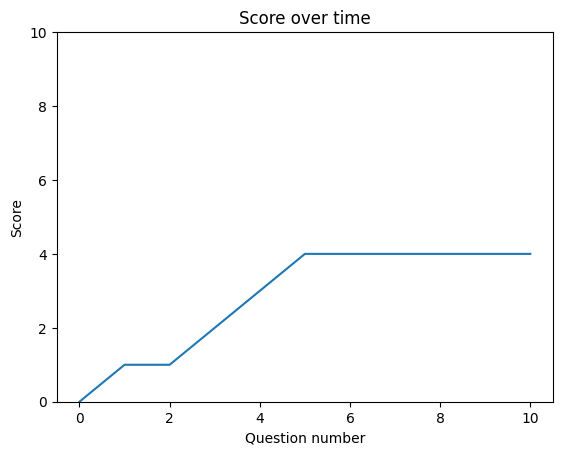


Thanks for trying!


In [7]:
import pandas as pd
from numpy import random
import string
import matplotlib.pyplot as plt

movies = pd.read_excel('Dataset/Movie_Dataset.xlsx')

# Data Cleaning
movies['genres'] = movies['genres'].str.lower()
def format_genres(genres):
 genres = genres.split('|')
 if len(genres) > 1:
    genres = ', '.join(genres[:-1]) + ' and ' + genres[-1]
 else:
    genres = genres[0]
 return genres
movies['genres'] = movies['genres'].apply(format_genres)
movies.dropna(inplace=True)
movies['year'] = pd.to_numeric(movies['year'], errors='coerce').fillna(0).astype(int)

def choose_difficulty():
  difficulty = input("Choose your difficulty level (Easy/Difficult): ").lower()
  if difficulty == 'easy':
      return movies['year'] > 1990
  elif difficulty == 'difficult':
      return movies['year'] < 1990
  else:
      print("Invalid choice, defaulting to Easy")
      return movies['year'] > 1990

def generate_question(movies, difficulty_filter):
   correct_movie = movies[difficulty_filter].sample(1)
   question = f"What is the title of the film released in {correct_movie['year'].values[0]} directed by {correct_movie['director_name'].values[0]}, starring {correct_movie['actor_name'].values[0]}, produced in {correct_movie['country'].values[0]} and belonging to the genre {correct_movie['genres'].values[0]}?"
   return question, correct_movie

def generate_answers(movies, correct_movie):
   incorrect_movies = movies.drop(correct_movie.index.values.tolist())
   incorrect_answers = incorrect_movies.sample(3)['movie_title'].values
   correct_answer = correct_movie['movie_title'].values[0]
   answers = [correct_answer] + list(incorrect_answers)
   random.shuffle(answers)
   return answers

def quiz(movies):
  difficulty_filter = choose_difficulty()
  score = 0
  score_history = [0]
  for i in range(1, 11):
      question, correct_movie = generate_question(movies, difficulty_filter)
      answers = generate_answers(movies, correct_movie)
      print(f"Question {i}. {question}")
      for j, answer in zip(string.ascii_uppercase, answers):
          print(f"{j}. {answer}")
      user_answer = input("Your answer: ").upper()
      while user_answer not in string.ascii_uppercase:
          print("You have another chance, try again!")
          user_answer = input("Your answer: ").upper()
      correct_answer = correct_movie['movie_title'].values[0]
      selected_answer = answers[string.ascii_uppercase.index(user_answer)]
      if selected_answer == correct_answer:
          print("Correct!\n")
          score += 1
          score_history.append(score) 
      else:
          print(f"Wrong! The correct answer is {correct_answer}\n")
          score_history.append(score) 
  print(f"Your total score is {score}/10!\n")
  plt.plot(score_history)
  plt.xlabel('Question number')
  plt.ylabel('Score')
  plt.title('Score over time')
  plt.ylim(0, 10)
  plt.show()
  retry = input("Do you want to retry? (yes/no): ").lower()
  if retry != 'no':
      quiz(movies)
  else:
      print("\nThanks for trying!")

quiz(movies)